## Asset Warranty Analysis (Flag 73)

### Dataset Description
The dataset consists of 500 entries simulating ServiceNow alm_hardware table, detailing key attributes of hardware assets such as asset tags, display names, configuration item (CI) identifiers, serial numbers, and model categories. It includes information on asset assignment, last update timestamps, cost, departmental allocation, and warranty expiration dates. The table effectively captures asset management activities, offering insights into the operational handling, allocation, and maintenance status of hardware resources across various departments within an organization.

### Your Task
**Goal**: Analyze the relationship between the cost of assets and their warranty periods to identify discrepancies and align procurement strategies with the observed asset value trends.

**Role**: Operations Manager

**Difficulty**: 2 out of 5. This analysis requires deciphering complex patterns in asset pricing and warranty terms.

**Category**: Asset Management


## Import Necessary Libraries
This cell imports all necessary libraries required for the analysis. This includes libraries for data manipulation, data visualization, and any specific utilities needed for the tasks. 

In [6]:
import argparse
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas import date_range

### Load Dataset
Loads the dataset needed for the asset analysis. The data is sourced from a CSV file and the process involves reading the file into a DataFrame to facilitate further operations. This also checks the initial few rows to verify the correct loading of the data.

In [7]:
dataset_path = "csvs/flag-73.csv"
flag_data = pd.read_csv(dataset_path)
df = pd.read_csv(dataset_path)
flag_data.head()


,cost,warranty_expiration,model_category,serial_number,sys_updated_on,department,asset_tag,purchased_on,assigned_to,display_name,ci
0,4208,2024-07-27 01:53:00,Computer,FAB-08483889,2024-03-14 01:53:00,Development,P1000000,2024-01-21 01:53:00,Allyson Gillispie,Dell Inspiron 7790 Computer,Inspiron 7790
1,4890,2024-02-10 20:29:00,Computer,SNF-87843340,2023-11-29 20:29:00,IT,P1000001,2023-11-12 20:29:00,Sam Sorokin,Dell Inspiron Desktop Computer,Inspiron Desktop
2,2818,2025-05-18 11:42:00,Computer,UOV-13907930,2024-02-11 11:42:00,IT,P1000002,2024-02-07 11:42:00,Garfield Lijewski,Dell Inspiron 15 3000 Series Computer,Inspiron 15 3000 Series
3,1987,2025-09-22 15:32:00,Computer,BPN-68889600,2024-02-02 15:32:00,Sales,P1000003,2023-12-30 15:32:00,Valeria Lingbeek,Dell Latitude 7490 Computer,Latitude 7490
4,2715,2025-01-03 12:16:00,Computer,NUA-00195760,2023-09-22 12:16:00,Customer Support,P1000004,2023-09-04 12:16:00,Rita Center,Dell Inspiron 15 Gaming Laptop,Inspiron 15 Gaming


### **Question 1:  How does the cost of assets vary by department, and are there any significant outliers in asset costs within each department?**


#### Analyzing Asset Costs by Department
This visualization groups assets by department to analyze variations in asset cost. It highlights cost distributions and any outliers, offering insights into which departments may have more expensive or less costly assets and helping identify potential areas for budget review or optimization.

<Figure size 864x432 with 0 Axes>

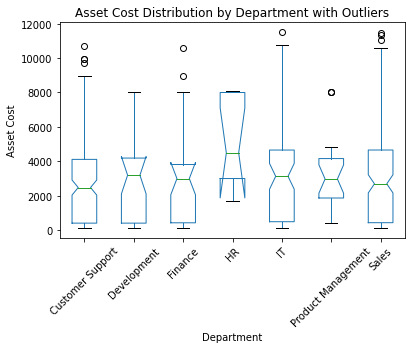

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Load data
flag_data = pd.read_csv("csvs/flag-73.csv")

# Convert `cost` to numeric in case of any non-numeric issues, and filter for positive costs only
flag_data["cost"] = pd.to_numeric(flag_data["cost"], errors="coerce")
filtered_data = flag_data[flag_data["cost"] > 0]

# Plotting boxplot to show cost distribution by department
plt.figure(figsize=(12, 6))
filtered_data.boxplot(
    column="cost", by="department", grid=False, showfliers=True, notch=True
)

# Enhancing the plot aesthetics
plt.title("Asset Cost Distribution by Department with Outliers")
plt.suptitle("")  # Remove the default pandas title
plt.xlabel("Department")
plt.ylabel("Asset Cost")
plt.xticks(rotation=45)  # Rotate department names for readability

plt.show()

#### Generate JSON Description for the Insight

In [9]:
{
    "data_type": "descriptive",
    "insight": "The HR department exhibits the highest average asset cost, while Customer Support and IT departments have greater variability with significant outliers.",
    "insight_value": {
        "description": "HR assets are consistently higher in cost, averaging close to $4928, suggesting they may receive premium or specialized equipment. Customer Support and IT, however, have wide cost ranges with frequent outliers, likely indicating mixed asset types or a variety of equipment quality levels."
    },
    "plot": {
        "plot_type": "boxplot",
        "title": "Asset Cost Distribution by Department with Outliers",
        "x_axis": {
            "name": "Department",
            "value": "Various departments including IT, Sales, HR, etc.",
            "description": "This axis categorizes asset costs by department to compare distributions.",
        },
        "y_axis": {
            "name": "Asset Cost",
            "value": "Costs ranging from low to high values, with several significant outliers",
            "description": "This axis shows the cost of assets in USD, displaying each department's range and distribution.",
        },
        "description": "The boxplot shows significant cost distribution differences among departments. HR has the highest median cost, while Customer Support and IT exhibit substantial cost variability, with frequent high-value outliers.",
    },
    "question": "How does the cost of assets vary by department, and are there any significant outliers in asset costs within each department?",
    "actionable_insight": "This analysis highlights the need for potential cost management, particularly within Customer Support and IT, where a broader cost range could signal inconsistent asset allocation or mixed equipment quality. HR's higher asset cost may warrant review to ensure expenditures align with actual needs, while identifying opportunities to standardize asset types or explore cost-effective options in departments with wider cost variability.",
}

{'data_type': 'descriptive',
 'insight': 'The HR department exhibits the highest average asset cost, while Customer Support and IT departments have greater variability with significant outliers.',
 'insight_value': {'description': 'HR assets are consistently higher in cost, averaging close to $4928, suggesting they may receive premium or specialized equipment. Customer Support and IT, however, have wide cost ranges with frequent outliers, likely indicating mixed asset types or a variety of equipment quality levels.'},
 'plot': {'plot_type': 'boxplot',
  'title': 'Asset Cost Distribution by Department with Outliers',
  'x_axis': {'name': 'Department',
   'value': 'Various departments including IT, Sales, HR, etc.',
   'description': 'This axis categorizes asset costs by department to compare distributions.'},
  'y_axis': {'name': 'Asset Cost',
   'value': 'Costs ranging from low to high values, with several significant outliers',
   'description': "This axis shows the cost of assets in 

### **Question 2: What is the distribution Average asset cost across  Model Categories?**


#### Plot average cost by model category
This cell presents a bar plot that illustrates the average cost of assets within each model category. By analyzing the cost distribution, this visualization helps identify financial implications of asset types managed by the department, offering insights into budget allocations etc.

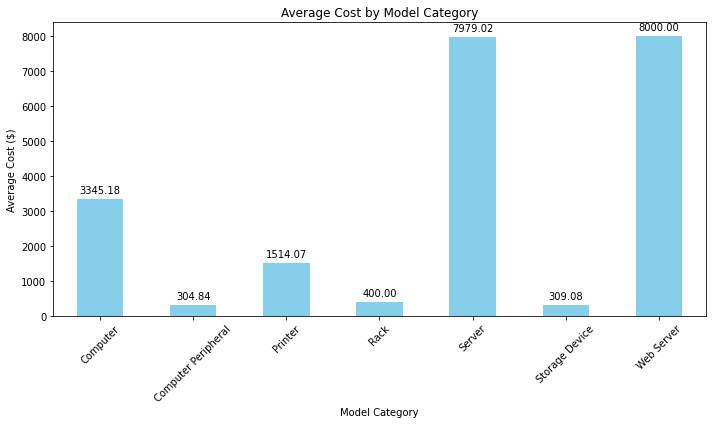

In [10]:
import matplotlib.pyplot as plt

flag_data["warranty_expiration"] = pd.to_datetime(flag_data["warranty_expiration"])
flag_data["sys_updated_on"] = pd.to_datetime(flag_data["sys_updated_on"])
# Calculate the warranty period in years for each asset
flag_data['warranty_period_years'] = (flag_data['warranty_expiration'] - flag_data['sys_updated_on']).dt.days / 365

# Group by model_category and calculate the average warranty period
avg_warranty_by_category = flag_data.groupby('model_category')['cost'].mean()

# Plotting
a_plot = avg_warranty_by_category.plot(kind='bar', color='skyblue', figsize=(10, 6))
for p in a_plot.patches:
    a_plot.annotate(format(p.get_height(), '.2f'), 
                          (p.get_x() + p.get_width() / 2., p.get_height()), 
                          ha = 'center', va = 'center', 
                          xytext = (0, 9), 
                          textcoords = 'offset points')
plt.xlabel('Model Category')
plt.ylabel('Average Cost ($)')
plt.title('Average Cost by Model Category')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels

# Show the plot
plt.show()

#### Generate JSON Description for the Insight

In [11]:
{
    "data_type": "descriptive",
    "insight": "Servers and Web Servers are the most expensive asset categories on average, followed by computers.",
    "insight_value": {
        "description": "Average costs vary significantly across model categories, with Servers and Web Servers leading in terms of investment required."
    },
    "plot": {
        "plot_type": "bar",
        "title": "Average Asset Cost by Model Category",
        "x_axis": {
            "name": "Model Category",
            "value": ["Server", "Web Server", "Computer", "Printer", "Rack", "Computer Peripheral", "Storage Device"],
            "description": "This axis categorizes different types of assets based on their model category."
        },
        "y_axis": {
            "name": "Average Cost (USD)",
            "value": {
                "Server": "8775.90$",
                "Web Server": "8000$",
                "Computer": "3274.48$",
                "Printer": "1478.14$",
                "Rack": "400.0$",
                "Computer Peripheral": "331.27$",
                "Storage Device": "299.9$"
            },
            "description": "This axis displays the average cost for each asset model category, highlighting the substantial cost disparities among different asset types."
        },
        "description": "The bar chart clearly illustrates the average costs associated with different asset model categories within the organization. It underscores that Servers and Web Servers are notably more expensive on average than other categories such as Computers, Printers, and more peripheral equipment."
    },
    "question": "What is the distribution of Average asset cost across Model Categories?",
    "actionable_insight": "Given the higher average costs associated with Servers and Web Servers, followed by computers, it's essential for the organization to carefully consider the lifecycle costs and benefits of these investments. This insight can inform budgeting decisions, procurement strategies, and asset management practices to optimize the organization's infrastructure and ensure cost-effective operations."
}


{'data_type': 'descriptive',
 'insight': 'Servers and Web Servers are the most expensive asset categories on average, followed by computers.',
 'insight_value': {'description': 'Average costs vary significantly across model categories, with Servers and Web Servers leading in terms of investment required.'},
 'plot': {'plot_type': 'bar',
  'title': 'Average Asset Cost by Model Category',
  'x_axis': {'name': 'Model Category',
   'value': ['Server',
    'Web Server',
    'Computer',
    'Printer',
    'Rack',
    'Computer Peripheral',
    'Storage Device'],
   'description': 'This axis categorizes different types of assets based on their model category.'},
  'y_axis': {'name': 'Average Cost (USD)',
   'value': {'Server': '8775.90$',
    'Web Server': '8000$',
    'Computer': '3274.48$',
    'Printer': '1478.14$',
    'Rack': '400.0$',
    'Computer Peripheral': '331.27$',
    'Storage Device': '299.9$'},
   'description': 'This axis displays the average cost for each asset model categor

### **Question 3: What is the correlation between the cost of computer assets and their warranty periods?**

#### Plot correlation between cost and warranty period of computers
This cell creates a scatter plot to visualize the relationship between the cost of computer assets and their warranty periods within 'Computer' model category. By plotting cost against warranty duration, this plot aims to explore whether less expensive computer assets come with longer warranties perhaps indicating potential anomaly.

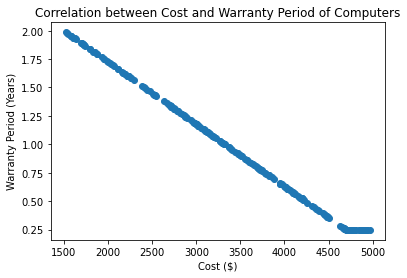

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

flag_data["warranty_expiration"] = pd.to_datetime(flag_data["warranty_expiration"])
flag_data["purchased_on"] = pd.to_datetime(flag_data["purchased_on"])

computer_data = flag_data[flag_data['model_category'] == 'Computer']
plt.scatter(computer_data['cost'], (computer_data['warranty_expiration'] - computer_data['purchased_on']).dt.days / 365)
plt.xlabel('Cost ($)')
plt.ylabel('Warranty Period (Years)')
plt.title('Correlation between Cost and Warranty Period of Computers')
plt.show()

#### Generate JSON Description for the Insight

In [13]:
{
    "data_type": "correlative",
    "insight": "Strong correlation between the cost of computer assets and their warranty periods.",
    "insight_value": {
        "description": "More expensive computer assets tend to have shorter warranty periods, suggesting that lower costs are associated with extended warranty provisions."
    },
    "plot": {
        "plot_type": "scatter",
        "title": "Correlation Between Cost of Computers and Their Warranty Periods",
        "x_axis": {
            "name": "Cost of Computer Assets (USD)",
            "value": "Continuously variable cost amounts",
            "description": "This axis represents the cost of computer assets, highlighting a range from lower to higher priced models."
        },
        "y_axis": {
            "name": "Warranty Period (years)",
            "value": "Continuously variable warranty durations",
            "description": "This axis displays the warranty periods associated with each cost level, illustrating how warranty durations increase with asset cost."
        },
        "description": "The scatter plot demonstrates a clear linear correlation between the cost of computer assets and their warranty periods. This trend confirms that more expensive computers although more expensive, tend to have shorter warranty periods, while lower-cost models are associated with longer warranty coverage. This insight can guide procurement decisions and warranty management strategies for computer assets."
    },
    "question": "What is the correlation between the cost of computer assets and their warranty periods?",
    "actionable_insight": "This observed correlation suggests that investing in more expensive computer assets may require additional warranty coverage to mitigate risks and ensure operational continuity. Organizations should consider negotiating extended warranty terms with vendors or investing in comprehensive warranty plans to protect high-value computer assets and minimize potential disruptions. Secondly, organisation can prioitise the procurement of lower cost computers to benefit from extended warranty provisions. This can help in optimizing the warranty management strategy and ensuring cost-effective asset maintenance."
}


{'data_type': 'correlative',
 'insight': 'Strong correlation between the cost of computer assets and their warranty periods.',
 'insight_value': {'description': 'More expensive computer assets tend to have shorter warranty periods, suggesting that lower costs are associated with extended warranty provisions.'},
 'plot': {'plot_type': 'scatter',
  'title': 'Correlation Between Cost of Computers and Their Warranty Periods',
  'x_axis': {'name': 'Cost of Computer Assets (USD)',
   'value': 'Continuously variable cost amounts',
   'description': 'This axis represents the cost of computer assets, highlighting a range from lower to higher priced models.'},
  'y_axis': {'name': 'Warranty Period (years)',
   'value': 'Continuously variable warranty durations',
   'description': 'This axis displays the warranty periods associated with each cost level, illustrating how warranty durations increase with asset cost.'},
  'description': 'The scatter plot demonstrates a clear linear correlation betwe

Question 4: What implications does the correlation between cost and warranty period have for asset lifecycle management?



Given the unusual correlation between the cost of computer assets and their warranty periods, the implications for asset lifecycle management could be significant:
1. **Strategic Procurement**: Organizations can strategize their procurement practices by opting for lower-cost assets that come with longer warranties. This approach could reduce long-term maintenance costs. \
2. **Budget Planning**: Understanding the correlation helps in forecasting budget allocations more accurately. Organizations can allocate funds for extended warranties based on the cost of computer assets. \
3. **Risk Management**: By choosing assets with longer warranties, organizations can mitigate the risk associated with equipment failures.

In essence, the correlation between asset cost and warranty duration informs a more thoughtful, cost-effective approach to managing the lifecycle of technology assets. Although it quite counterintutive that higher spec computers have shorter warranty periods, it is either a strategic move by the vendors to ensure that the cost of the warranty is not passed on to the customer. or  the vendors are confident in the quality of the product and hence do not see the need for a longer warranty period.

### Summary of Findings (Flag 73):

1. **Asset Cost Variability by Department** (Question 1): The HR department consistently has the highest average asset cost, indicating potential premium or specialized equipment allocation. In contrast, Customer Support and IT departments show significant cost variability with frequent outliers, suggesting mixed asset types or varying equipment quality levels.

2. **Average Cost by Model Category** (Question 2): Servers and Web Servers are the most expensive asset categories on average, followed by computers. This highlights the need for careful budgeting and procurement strategies to manage these high-cost investments effectively.

3. **Correlation Between Cost and Warranty Period** (Question 3): There is a strong correlation where more expensive computer assets tend to have shorter warranty periods. This suggests that organizations may need to negotiate extended warranty terms for high-value assets or prioritize lower-cost computers to benefit from longer warranty coverage.